## Riddler problem: how many bananas can the camel transport to the market?

This was posed as a [Riddler](http://fivethirtyeight.com/features/how-many-bananas-does-it-take-to-lead-a-camel-to-market/) problem on Sept. 2, 2016:

>You have a camel and 3,000 bananas. You would like to sell your bananas at the bazaar 1,000 miles away. Your loyal camel can carry at most 1,000 bananas at a time. However, it has an insatiable appetite and quite the nose for bananas — if you have bananas with you, it will demand one banana per mile traveled. In the absence of bananas on his back, it will happily walk as far as needed to get more bananas, loyal beast that it is. What should you do to get the largest number of bananas to the bazaar? What is that number?

I solved the problem in the general case with $n$ bananas that must be carried a distance $d$. The following is Julia code that plots the solution for various choices of $(n,d)$. A write-up explaining my solution can be found [here](http://www.laurentlessard.com/bookproofs/how-many-bananas-can-the-camel-carry/).

[Laurent Lessard](http://www.laurentlessard.com)

In [4]:
using PyPlot

M = 1000       # camel banana-carrying capacity
nmax = 10000   # max number of bananas shown on plot
dmax = 3000    # max distance of market shown on plot
div = 10       # discretization step (larger value = faster but less accurate plotting)

nvals,dvals = 0:div:nmax,0:div:dmax

ft = zeros( length(dvals), length(nvals) )    # fraction transported
tt = zeros( length(dvals), length(nvals) )    # total transported

for (i,n) in enumerate(nvals)
    (q,r) = divrem(n,M)
    for (j,d) in enumerate(dvals)
        nn,dd = n,d
        nn,dd = dd>r/(q+1) ? (nn-r,dd-r/(q+1)) : (nn-(q+1)*dd,0)        
        for k = q:-1:1
            nn,dd = dd>M/k ? (nn-M,dd-M/k) : (nn-k*dd,0)
        end        
        ft[j,i],tt[j,i] = (nn==0 && dd>0) ? (-1,-1) : (nn/n,nn)     # kludge to distinguish limit of reachability
    end
end

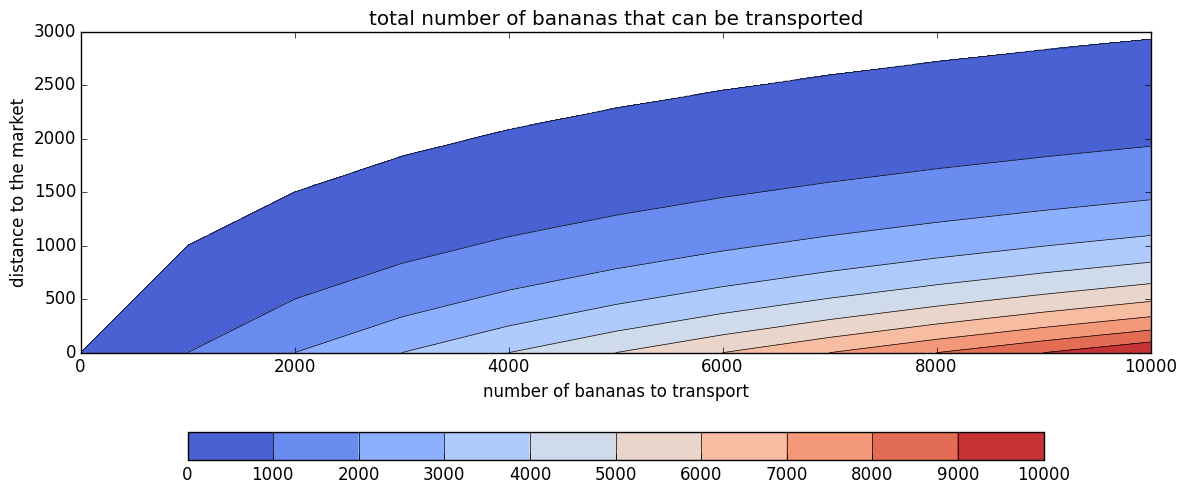

In [5]:
# PLOT FIRST FIGURE: TOTAL NUMBER OF BANANAS THAT CAN BE TRANSPORTED
figure(figsize=(12,6))
contourf(nvals,dvals,tt,0:M:nmax,cmap=get_cmap("coolwarm"))
colorbar(orientation="horizontal",drawedges=true,shrink=.8,aspect=30,pad=0,ticks=0:M:nmax)
contour(nvals,dvals,tt,0:M:nmax,colors="black",linewidths=.5)
xlabel("number of bananas to transport"); ylabel("distance to the market")
title("total number of bananas that can be transported")
axis("image"); tight_layout()
savefig("bananacamel_tot.png")

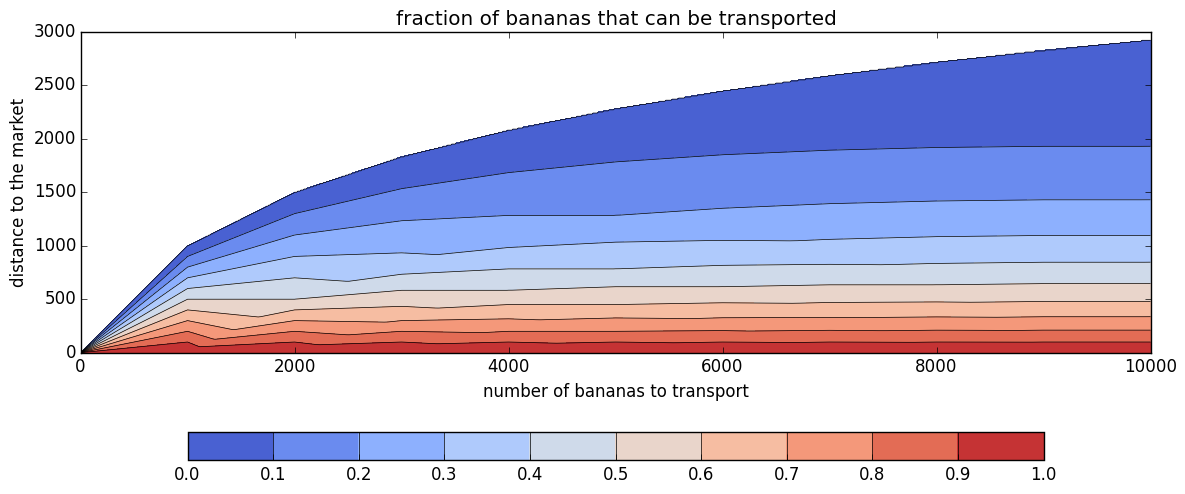

In [6]:
# PLOT SECOND FIGURE: FRACTION OF BANANAS THAT CAN BE TRANSPORTED
figure(figsize=(12,6))
contourf(nvals,dvals,ft,0:0.1:1,cmap=get_cmap("coolwarm"))
colorbar(orientation="horizontal",drawedges=true,shrink=.8,aspect=30,pad=0,ticks=0:0.1:1)
contour(nvals,dvals,ft,0:0.1:1,colors="black",linewidths=.5)
xlabel("number of bananas to transport")
ylabel("distance to the market")
title("fraction of bananas that can be transported")
axis("image"); tight_layout()
savefig("bananacamel_frac.png")